In [99]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


this data is generated from the notebook Bangladesh_obtain_data.ipynb, which in turn takes the data found in https://drive.google.com/drive/folders/1WxClYLd-j0sSvnc8AqKTisghItf5HfaR

In [2]:
MainPath = os.path.normpath(os.getcwd() + os.sep)
DataPath = str(MainPath) + "\\bangladesh_data\\"
print(DataPath)

C:\Users\Owner\Desktop\Projects\Research\DataDive\Gender\workstream2\eda-bangladesh\bangladesh_data\


In [3]:
df = pd.read_csv(DataPath + "Bangladesh_Household_Data.csv", index_col=0, low_memory=False)

In [4]:
df.head()

,Relationship to the head,Sex,Age_2,Highest level of education attended,Year of interview,Area,Division,District,Functional difficulties (age 18-49 years),Combined wealth score,Wealth index quintile,Percentile Group of com1,Ethnicity of household head,Education of household head
0,HEAD,MALE,35.0,HIGHER,2019.0,URBAN,Barishal,Barguna,No information,1.442586,Richest,9th decile,Bengali,Higher secondary+
1,SPOUSE / PARTNER,FEMALE,24.0,SECONDARY/ HIGHER SECONDARY,2019.0,URBAN,Barishal,Barguna,No information,1.442586,Richest,9th decile,Bengali,Higher secondary+
2,SON / DAUGHTER,MALE,4.0,NaN,2019.0,URBAN,Barishal,Barguna,Has no functional difficulty,1.442586,Richest,9th decile,Bengali,Higher secondary+
3,PARENT,FEMALE,62.0,PRIMARY,2019.0,URBAN,Barishal,Barguna,No information,1.442586,Richest,9th decile,Bengali,Higher secondary+
4,HEAD,MALE,30.0,SECONDARY/ HIGHER SECONDARY,2019.0,URBAN,Barishal,Barguna,No information,0.001265,Middle,6th decile,Bengali,Secondary


In [5]:
df["Sex"].value_counts()

FEMALE    131216
MALE      130943
Name: Sex, dtype: int64

In [6]:
df["Functional difficulties (age 18-49 years)"].value_counts()

No information                  180020
Has no functional difficulty     79799
Has functional difficulty         2340
Name: Functional difficulties (age 18-49 years), dtype: int64

In [7]:
df["Wealth index quintile"].value_counts()

Poorest    60555
Second     55562
Middle     53742
Fourth     50217
Richest    42083
Name: Wealth index quintile, dtype: int64

In [8]:
df[df["Wealth index quintile"]=="Richest"]["Combined wealth score"].describe()

count    42083.000000
mean         1.830809
std          0.615377
min          1.007567
25%          1.311778
50%          1.689570
75%          2.274161
max          4.047958
Name: Combined wealth score, dtype: float64

In [9]:
df[df["Wealth index quintile"]=="Poorest"]["Combined wealth score"].describe()

count    60555.000000
mean        -1.038323
std          0.346622
min         -2.175247
25%         -1.323439
50%         -0.960289
75%         -0.714512
max         -0.614200
Name: Combined wealth score, dtype: float64

#### Relationship between wealth, gender & education

### Median combined wealth score & Education

In [92]:
plot_df = df[~pd.isna(df["Highest level of education attended"])].copy(deep=True)
plot_df= plot_df[["Highest level of education attended", "Combined wealth score", "Sex"]]



In [93]:
display(plot_df["Highest level of education attended"].value_counts())
display(plot_df["Highest level of education attended"].unique())

PRIMARY                        74052
SECONDARY/ HIGHER SECONDARY    50090
LOWER SECONDARY                40173
HIGHER                         15284
ECE                             8096
DK                                43
NO RESPONSE                        7
Name: Highest level of education attended, dtype: int64

array(['HIGHER', 'SECONDARY/ HIGHER SECONDARY', 'PRIMARY',
       'LOWER SECONDARY', 'ECE', 'DK', 'NO RESPONSE'], dtype=object)

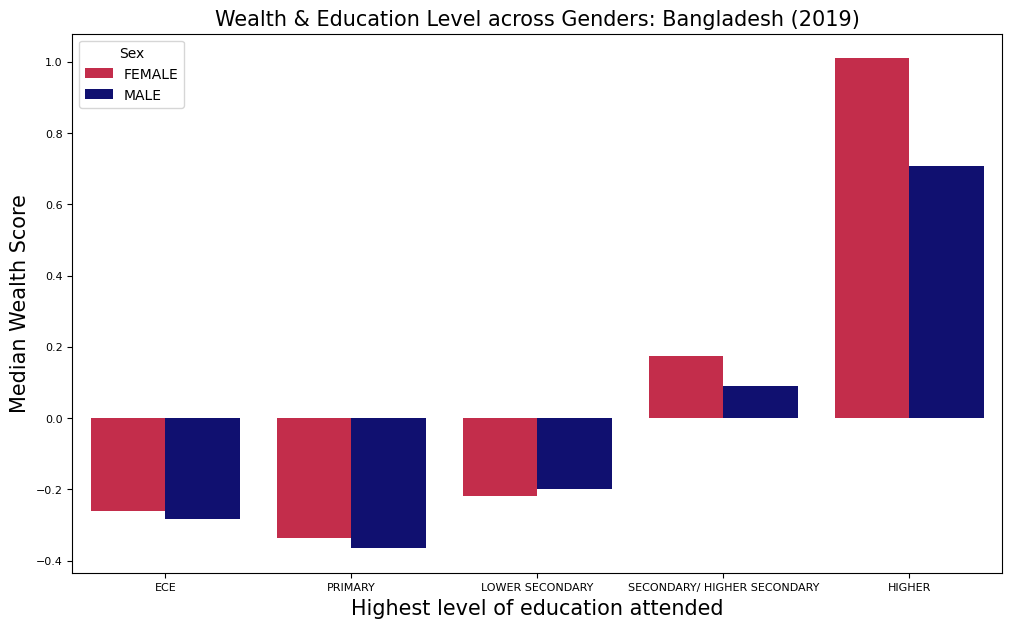

In [94]:
select_grp = [ 'ECE',  'PRIMARY','LOWER SECONDARY', 'SECONDARY/ HIGHER SECONDARY', 'HIGHER']
plot_df = plot_df[plot_df["Highest level of education attended"].isin(select_grp)]
plot_df = plot_df.groupby(["Highest level of education attended",  "Sex"]).median().reset_index()
order = [ 'ECE',  'PRIMARY','LOWER SECONDARY', 'SECONDARY/ HIGHER SECONDARY', 'HIGHER']
mapping = {edu: i for i, edu in enumerate(order)}
key = plot_df['Highest level of education attended'].map(mapping)
plot_df =plot_df.iloc[key.argsort()]

fig = plt.figure(figsize=(12, 7)) 
pal =  {"FEMALE": "Crimson", "MALE": "Navy"}
b = sns.barplot(data=plot_df, x='Highest level of education attended', y='Combined wealth score', hue='Sex', palette = pal)
b.axes.set_title("Wealth & Education Level across Genders: Bangladesh (2019)",fontsize=15)
b.set_xlabel("Highest level of education attended",fontsize=15)
b.set_ylabel("Median Wealth Score",fontsize=15)
b.tick_params(labelsize=8)
plt.show()


#### Wealth index quintile and education

### Calculate percentages at each education level for each gender & wealth quintile cohort

In [118]:
plot_df = df[~pd.isna(df["Highest level of education attended"])].copy(deep=True)
select_grp = [ 'ECE',  'PRIMARY','LOWER SECONDARY', 'SECONDARY/ HIGHER SECONDARY', 'HIGHER']
plot_df = plot_df[plot_df["Highest level of education attended"].isin(select_grp)]

plot_df= plot_df[["Highest level of education attended", "Wealth index quintile", "Sex", "Age_2"]]
plot_df1 = plot_df.groupby(["Wealth index quintile",  "Sex", "Highest level of education attended"]).count().reset_index()
plot_df1.columns = ["Wealth index quintile",  "Sex", "Highest level of education attended", "count"]
sum_df = plot_df[["Wealth index quintile",  "Sex", "Age_2"]].groupby(["Wealth index quintile",  "Sex"]).count().reset_index()
sum_df.columns = ["Wealth index quintile",  "Sex", "total"]
plot_df1 = plot_df1.merge(sum_df, on =["Wealth index quintile",  "Sex"], how = "outer")
plot_df1["perc"] =100*plot_df1["count"]/plot_df1["total"]

In [119]:
#plot_df1 

In [121]:
plot_df1 = plot_df1[["Wealth index quintile", "Sex", "Highest level of education attended", "perc"]]

<Axes: title={'center': 'Level of Education in Wealth Quintiles: Bangladesh (2019)'}>

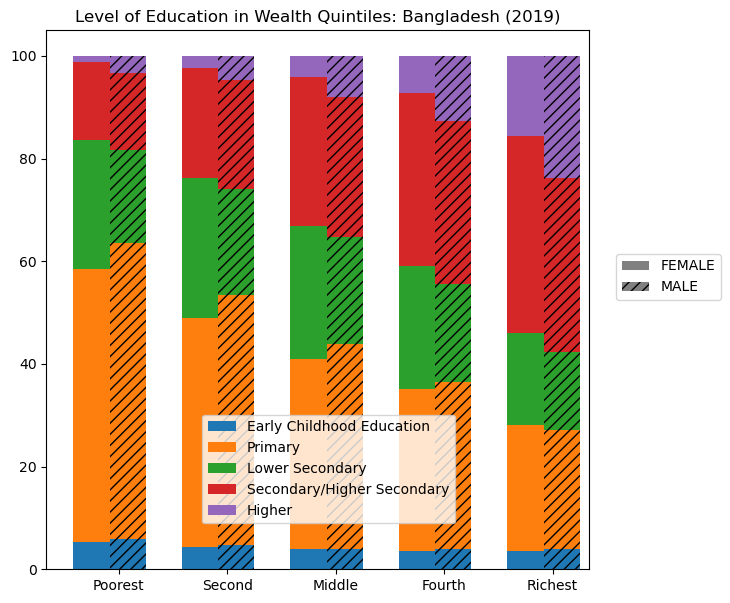

In [225]:
def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="///", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)
    #axe.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc='upper center', bbox_to_anchor=(0.52, 0.3))
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1],  bbox_to_anchor=(1.05, 0.5))
    axe.add_artist(l1)

    return axe

# create fake dataframes
# df1 = pd.DataFrame(np.random.rand(4, 5),
#                    index=["A", "B", "C", "D"],
#                    columns=["I", "J", "K", "L", "M"])
# df2 = pd.DataFrame(np.random.rand(4, 5),
#                    index=["A", "B", "C", "D"],
#                    columns=["I", "J", "K", "L", "M"])
# df3 = pd.DataFrame(np.random.rand(4, 5),
#                    index=["A", "B", "C", "D"], 
#                    columns=["I", "J", "K", "L", "M"])
femaledf = plot_df1.query('Sex=="FEMALE"').reset_index()[["Wealth index quintile"]+select_grp]
femaledf.columns.name = None
femaledf = femaledf.set_index("Wealth index quintile")
femaledf.index.name = None
femaledf = femaledf.reindex(["Poorest", "Second", "Middle", "Fourth", "Richest"])
femaledf.columns = ['Early Childhood Education',  'Primary','Lower Secondary', 'Secondary/Higher Secondary', 'Higher']
maledf = plot_df1.query('Sex=="MALE"').reset_index()[["Wealth index quintile"]+select_grp]
maledf.columns.name = None
maledf = maledf.set_index("Wealth index quintile")
maledf.index.name = None
maledf = maledf.reindex(["Poorest", "Second", "Middle", "Fourth", "Richest"])
maledf.columns = ['Early Childhood Education',  'Primary','Lower Secondary', 'Secondary/Higher Secondary', 'Higher']

plt.figure(figsize = [7, 7])
plt.tight_layout()
plot_clustered_stacked([femaledf, maledf],["FEMALE", "MALE"],
                       title = "Level of Education in Wealth Quintiles: Bangladesh (2019)")